<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librerías" data-toc-modified-id="Librerías-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librerías</a></span></li><li><span><a href="#Datos" data-toc-modified-id="Datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Datos</a></span></li><li><span><a href="#Análisis-exploratorio" data-toc-modified-id="Análisis-exploratorio-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Análisis exploratorio</a></span><ul class="toc-item"><li><span><a href="#Tipo-de-datos" data-toc-modified-id="Tipo-de-datos-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tipo de datos</a></span></li><li><span><a href="#Valores-nulos-o-duplicados" data-toc-modified-id="Valores-nulos-o-duplicados-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Valores nulos o duplicados</a></span></li><li><span><a href="#Análisis-estadístico" data-toc-modified-id="Análisis-estadístico-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Análisis estadístico</a></span><ul class="toc-item"><li><span><a href="#Análisis-de-la-variable-dependiente" data-toc-modified-id="Análisis-de-la-variable-dependiente-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Análisis de la variable dependiente</a></span></li><li><span><a href="#Análisis-de-las-variables-independientes" data-toc-modified-id="Análisis-de-las-variables-independientes-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Análisis de las variables independientes</a></span></li><li><span><a href="#Análisis-de-correlaciones" data-toc-modified-id="Análisis-de-correlaciones-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Análisis de correlaciones</a></span></li></ul></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Eliminar-variables-correlacionadas" data-toc-modified-id="Eliminar-variables-correlacionadas-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Eliminar variables correlacionadas</a></span></li><li><span><a href="#Split-de-los-datos" data-toc-modified-id="Split-de-los-datos-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Split de los datos</a></span></li></ul></li><li><span><a href="#Algoritmos:-regresión-lineal" data-toc-modified-id="Algoritmos:-regresión-lineal-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Algoritmos: regresión lineal</a></span><ul class="toc-item"><li><span><a href="#Regresión-lineal-múltiple" data-toc-modified-id="Regresión-lineal-múltiple-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Regresión lineal múltiple</a></span></li><li><span><a href="#Regresión-lineal-con-Regularización-Ridge" data-toc-modified-id="Regresión-lineal-con-Regularización-Ridge-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Regresión lineal con Regularización Ridge</a></span></li><li><span><a href="#Regresión-polinomial" data-toc-modified-id="Regresión-polinomial-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Regresión polinomial</a></span></li></ul></li><li><span><a href="#Aplicación-a-los-datos-predict" data-toc-modified-id="Aplicación-a-los-datos-predict-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Aplicación a los datos predict</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

# Librerías

In [1]:
# Librerías para el tratamiento de los datos:
# ----------------------------------------------------------------------------------------------------------------------
import numpy as np
import pandas as pd
from pandas import Int64Index as NumericIndex  

# Librerías para la realización de gráficos:
# ----------------------------------------------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

# Librerías para el procesado y modelado de los datos:
# ----------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
import scipy.stats as stats

# Configuración de los warnings:
import warnings
warnings.filterwarnings('ignore')

C:\Users\Laura\AppData\Local\Temp/ipykernel_19972/883989443.py:5: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
C:\Users\Laura\miniconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# Datos

In [2]:
# Importamos los datos train desde los ficheros csv.

df_train_1 = pd.read_csv('data Predicción Precio casa/train_1.csv')
df_train_2 = pd.read_csv('data Predicción Precio casa/train_2.csv')

In [3]:
# Echamos un primer vistazo a ambos dataframes para buscar el campo común por el que los juntaremos,
# Y para verificar que no hay columnas con el mismo nombre en ambos datasets, y que tienen el mismo nº de filas

print(df_train_1)
print(df_train_2)

      ID    zn  chas     rm     dis  rad  tax  medv
0      1  18.0     0  6.575  4.0900    1  296  24.0
1      2   0.0     0  6.421  4.9671    2  242  21.6
2      4   0.0     0  6.998  6.0622    3  222  33.4
3      5   0.0     0  7.147  6.0622    3  222  36.2
4      7  12.5     0  6.012  5.5605    5  311  22.9
..   ...   ...   ...    ...     ...  ...  ...   ...
328  500   0.0     0  5.569  2.3999    6  391  17.5
329  502   0.0     0  6.593  2.4786    1  273  22.4
330  503   0.0     0  6.120  2.2875    1  273  20.6
331  504   0.0     0  6.976  2.1675    1  273  23.9
332  506   0.0     0  6.030  2.5050    1  273  11.9

[333 rows x 8 columns]
      ID     crim  indus    nox   age  ptratio   black  lstat
0      1  0.00632   2.31  0.538  65.2     15.3  396.90   4.98
1      2  0.02731   7.07  0.469  78.9     17.8  396.90   9.14
2      4  0.03237   2.18  0.458  45.8     18.7  394.63   2.94
3      5  0.06905   2.18  0.458  54.2     18.7  396.90   5.33
4      7  0.08829   7.87  0.524  66.6     

In [4]:
# Juntamos ambos ficheros con la función 'merge', indicando la columna ID (identificador de la casa) como campo 'join'. 
# Deberíamos tener un dataframe de 15 columnas y 333 filas, 332 sin el encabezados. 

df_train = pd.merge(df_train_1, df_train_2, on='ID')
df_train

,ID,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,1,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,2,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,4,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,5,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,7,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.0,0,5.569,2.3999,6,391,17.5,0.17783,9.69,0.585,73.5,19.2,395.77,15.10
329,502,0.0,0,6.593,2.4786,1,273,22.4,0.06263,11.93,0.573,69.1,21.0,391.99,9.67
330,503,0.0,0,6.120,2.2875,1,273,20.6,0.04527,11.93,0.573,76.7,21.0,396.90,9.08
331,504,0.0,0,6.976,2.1675,1,273,23.9,0.06076,11.93,0.573,91.0,21.0,396.90,5.64


In [5]:
# Renombramos algunas columnas para facilitar el trabajo y la comprensión durante durante el proceso.

df_train = df_train.rename(columns = {'zn':'residential', 'chas':'river', 'rm':'mean_rooms', 'dis':'distance_business'})
df_train

,ID,residential,river,mean_rooms,distance_business,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,1,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,2,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,4,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,5,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,7,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.0,0,5.569,2.3999,6,391,17.5,0.17783,9.69,0.585,73.5,19.2,395.77,15.10
329,502,0.0,0,6.593,2.4786,1,273,22.4,0.06263,11.93,0.573,69.1,21.0,391.99,9.67
330,503,0.0,0,6.120,2.2875,1,273,20.6,0.04527,11.93,0.573,76.7,21.0,396.90,9.08
331,504,0.0,0,6.976,2.1675,1,273,23.9,0.06076,11.93,0.573,91.0,21.0,396.90,5.64


# Análisis exploratorio

## Tipo de datos

In [6]:
# Comprobamos el tipo de datos que tiene cada columna

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 333 non-null    int64  
 1   residential        333 non-null    float64
 2   river              333 non-null    int64  
 3   mean_rooms         333 non-null    float64
 4   distance_business  333 non-null    float64
 5   rad                333 non-null    int64  
 6   tax                333 non-null    int64  
 7   medv               333 non-null    float64
 8   crim               333 non-null    float64
 9   indus              333 non-null    float64
 10  nox                333 non-null    float64
 11  age                333 non-null    float64
 12  ptratio            333 non-null    float64
 13  black              333 non-null    float64
 14  lstat              333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 41.6 KB


Todas las columnas son numéricas, y aparentemente no tenemos nulos. 

## Valores nulos o duplicados

In [7]:
# Vemos si tenemos datos nulos o duplicados

print('\nValores nulos:\n', df_train.isna().sum())
print('\nEntradas duplicadas:\n', df_train.duplicated().sum())


Valores nulos:
 ID                   0
residential          0
river                0
mean_rooms           0
distance_business    0
rad                  0
tax                  0
medv                 0
crim                 0
indus                0
nox                  0
age                  0
ptratio              0
black                0
lstat                0
dtype: int64

Entradas duplicadas:
 0


Vemos que no tenemos valores ni nulos ni duplicados; nuestro data set está bastante bien. 
La columna ID no nos va a servir para nada en nuestro modelo, así que la vamos a eliminar ya. 

In [8]:
df_train = df_train.drop('ID', axis=1)
df_train

,residential,river,mean_rooms,distance_business,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0,5.569,2.3999,6,391,17.5,0.17783,9.69,0.585,73.5,19.2,395.77,15.10
329,0.0,0,6.593,2.4786,1,273,22.4,0.06263,11.93,0.573,69.1,21.0,391.99,9.67
330,0.0,0,6.120,2.2875,1,273,20.6,0.04527,11.93,0.573,76.7,21.0,396.90,9.08
331,0.0,0,6.976,2.1675,1,273,23.9,0.06076,11.93,0.573,91.0,21.0,396.90,5.64


## Análisis estadístico

Más adelante vamos a aplicar un modelo de regresión lineal múltiple, el cual necesita se cumplan ciertos supuestos para tener la máxima validez y que trataremos de verificar en nuestro dataset. 

* Distribución normal de la variable dependiente (también variable *respuesta* o *target*). 
* No colinealidad o multicolinealidad entre las variables predictoras o independientes, esto es, las variables predictoras deben ser independientes entre sí. 
* Linealidad entre las variables predictoras y la variable respuesta: cada predictor debe estar linearmente relacionado con la variable respuesta, manteniéndose los demás constantes. Esto es difícil e verificar, pero más adelante trataremos de hacer alguna aproximación. 
* Independencia de los errores
* Homocesdasticidad o igualdad de las varianzas en la variable respuesta

### Análisis de la variable dependiente

In [9]:
# En primer lugar, vamos a mirar las estadísticas de la variable respuesta: 'medv', valor medio de cada casa en /1000$. 

df_train['medv'].describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

Vemos que no hay grandes diferencias entre la moda y la media, y que la distancia inercuartílica entre Q1 y Q2, y entre Q2 y Q3 es también muy similar. Además, la desviación estándar es razonable, lo que parece indicar que no hay una gran variabilidad de los datos. Esto nos hace pensar que podemos estar ante una distribució normal. No obstante, entre el min y Q1 hay una distancia de 12 puntos, mientras que entre Q3 y el máximo es de 25. Habremos de verficiar si hay outliers. 

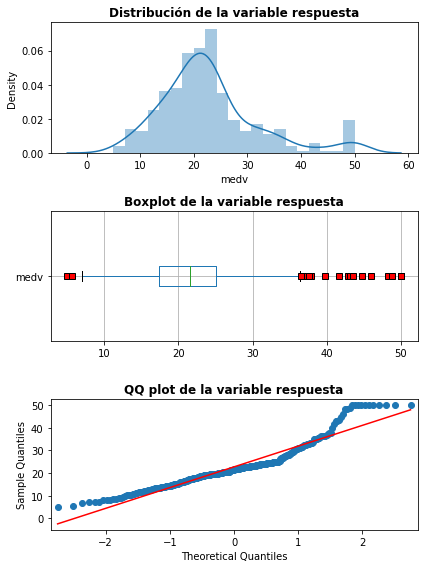

In [10]:
# Verificamos la distribución de la varbiale respuesta y si tenemos outliers. 
# Usamos matplotlip para configurar cada gráficos cun conjunto, seaborn para la distribución, pandas para el boxplot,
# y statsmodels para el Q-Q plot (compara la distribución de la variable con una distribución normal)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 8))

sns.distplot(df_train['medv'], ax = axes[0])
axes[0].set_title("Distribución de la variable respuesta", fontweight = 'bold')

red_square = dict(markerfacecolor = 'r', marker = 's')
df_train.boxplot(['medv'], vert = False, flierprops = red_square, ax = axes[1])
axes[1].set_title("Boxplot de la variable respuesta", fontweight = 'bold')

sm.qqplot(df_train['medv'], stats.norm, line='s', ax=axes[2])
axes[2].set_title("QQ plot de la variable respuesta", fontweight = 'bold')
plt.show

fig.tight_layout()

Vemos que la distribución se aproxima a la normal, aunque en las colas tenemos algunas observaciones con valores superiores, lo que provoca una cola a la izquierda. Es decir, hay algunas casas que tienen un valor muy superior a la media, y también algunas con un valor inferior. Antes de decidir si las eliminamos, vamos a intentar estudiarlas un poco más. Para ello, vamos a calcular los cuartiles y los límites inferior y superior, y vamos a identificar las casas cuyo valor medio se encuentra fuera de los límites. 

In [11]:
# Calculamos los quartiles con la función percentil de numpy: el cuartil tres se corresponde con el percentil (pc) 75
# el cuartil 1 con el pc25, el espacio intercuartil incluye los valores situados entre pc25 y pc 75,
# y los límites se corresponde con 1,5 veces el espacio intercuartil

for x in ['medv']:
    q3, q1 = np.percentile(df_train.loc[:,x], [75,25])
    inter_quartile = q3-q1
    limite_superior = q3 + (1.5*inter_quartile)
    limite_inferior = q1 - (1.5*inter_quartile)

print("Límite inferior de la varible target = ", round(limite_superior, 2))
print("Q1 = ", q1)
print("Q3 = ", q3)
print("Límite superior de la variable target = ", round(limite_inferior, 2))

Límite inferior de la varible target =  36.4
Q1 =  17.4
Q3 =  25.0
Límite superior de la variable target =  6.0


In [12]:
# Seleccionamos las casas outliers, las situadas por debajo y por encima de los límites

medv_outliers_up = df_train[df_train['medv'] > limite_superior]
medv_outliers_low = df_train[df_train['medv'] < limite_inferior]
medv_interquartile = df_train[(df_train['medv'] >= q1) & (df_train['medv'] <= q3)]

print(medv_outliers_up.shape)
print(medv_outliers_low.shape)

(26, 14)
(2, 14)


Vemos que tenemos 28 outliers en la variable target, que sobre una muestra de 332, es cerca del 10%, una proporción elevada. 
Seguimos con el análisis, para lo que vamos a comparar las estadísticas de las outliers y de las casas intercuartil. 

In [13]:
# Definimos una función que nos facilitará el proceso
# Y la aplicamos a ambos conjuntos de datos

def estadisticas(df):
    print('{:<23}'.format('Column'), '{:<23}'.format('Mean'), '{:<23}'.format('Std'), '{:<10}'.format('Median'), '{:<10}'.format('Min'), '{:<10}'.format('Max'),'\n')
    for col in df:
        print('{:<23}'.format(col), '{:<23}'.format(df[col].mean()), '{:<23}'.format(df[col].std()), '{:<10}'.format(df[col].median()), '{:<10}'.format(df[col].min()), '{:<10}'.format(df[col].max()))

print(estadisticas(medv_outliers_up))
print(estadisticas(medv_outliers_low))
print(estadisticas(medv_interquartile))

Column                  Mean                    Std                     Median     Min        Max        

residential             17.192307692307693      30.31437841126779       0.0        0.0        95.0      
river                   0.19230769230769232     0.40191847623425025     0.0        0          1         
mean_rooms              7.556730769230769       0.8574067206497653      7.798      4.97       8.725     
distance_business       3.2664153846153843      1.862299640056306       2.8505000000000003 1.1296     8.9067    
rad                     8.038461538461538       7.174849234545736       5.0        1          24        
tax                     339.46153846153845      157.21379857232145      307.0      193        666       
medv                    45.51923076923077       5.128354061939892       48.4       36.5       50.0      
crim                    1.5025742307692307      2.626046709734118       0.45114    0.01501    9.2323    
indus                   7.963846153846154    

Por lo que podemos ver, parece que las mayores diferencias entre las casas con un valor muy superior a la media y las casas en el inervalo intercuartil son:

* columna *resi*: outliers con mayor proporción de terreno residencial; de hecho, todas las casas cuyo valor medio se encuentra por debajo del límite inferior del boxplot, tienen un valor para la variable resi = 0
* columna *tax*: outliers con un impuesto menor sobre el valor total de la propiedad.   
* columna *indus*: outliers con una menor proporción de negocios no minoristas en la ciudad. 
* columna *lstat*: outliers con un menor porcentaje de de población con estatus bajo. 

Así, parece que los outliers de nuestro dataset tienen sentido, en tanto que se diferencian de las casas medias en características que parecen relevantes para determinar el valor al que se puede vender una casa. Lo veremos analizando las correlaciones entre estas variables y la variable target. 

Una posibilidad para estas diferencias es que las outliers estén situadas en regiones muy concretas, lo cuál sería interesante saber para afinar el modelo predictivo, o incluso para tener dos diferentes. 

Por otra parte, vemos también que nuestros predictores se mueven en rangos de valores muy diferentes entre sí: hay una variable que se mueve en entre 0 y debajo de 1 (nox), otras por debajo de 30, y otras que ascienden hasta cerca de 400. Así, en el preprocessing tendremos que estandarizarlas para evitar que las variables con un mayor rango de valores tengan un peso excesivo en el modelo predictivo. 

Como podemos ver, en el dataframe en que hemos eliminado los regitros situados a +/- 2 desviaciones típicas de la media, nuestra variable dependiente se ajusta mucho más a una distribución normal. Ello debería ayudar a una mayor accuracy de la regresión lineal. 

### Análisis de las variables independientes

Text(0.5, 0.98, 'Distribución de las variables independientes')

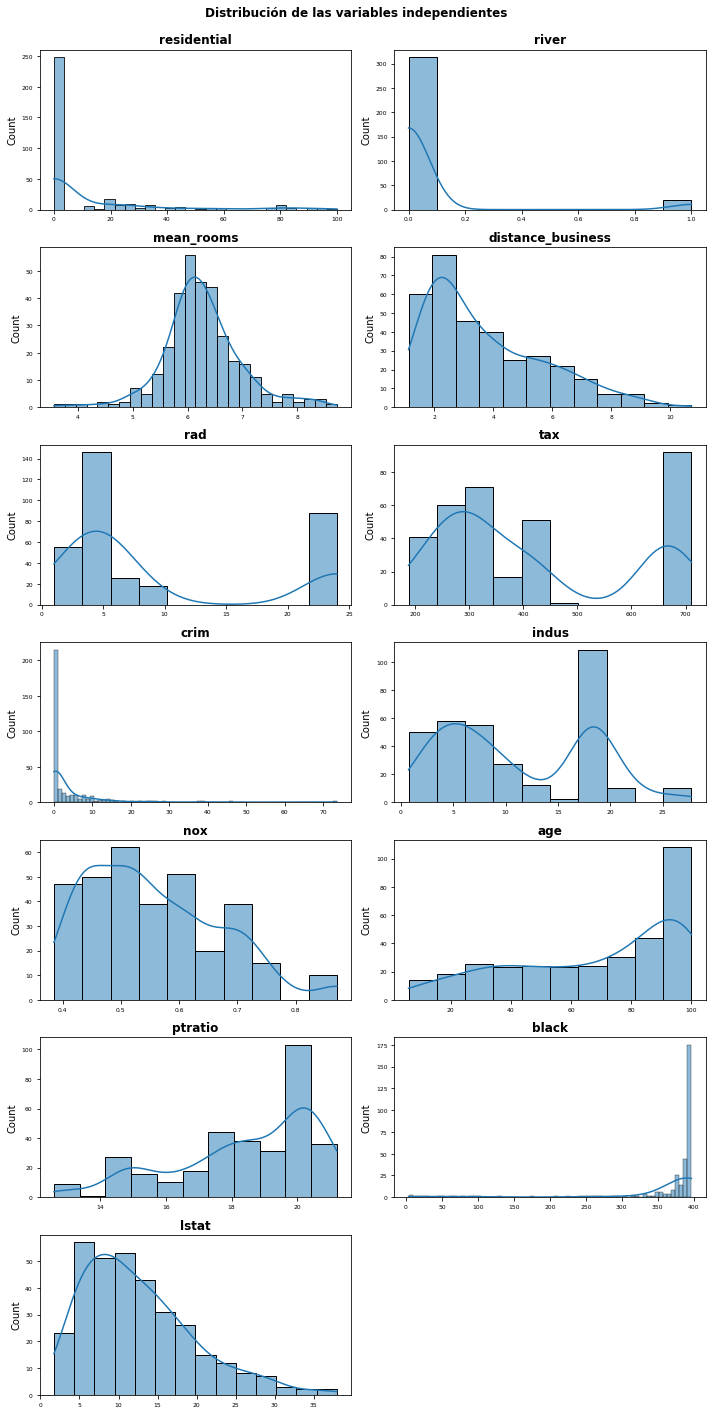

In [14]:
# Vamos a ver la distribución de las variables predictoras.
# Primero las aislamos de la variable dependiente creando un subset "predictors", y luego las graficamos usando un loop
# Usamos matplotlib para la configuración como conjunto y seaborn para la distribución.

predictors = df_train.drop('medv', axis=1)

fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))
axes = axes.flat

for i, column in enumerate(predictors):
    sns.histplot(data = predictors, x = column, stat = "count", kde = True, ax = axes[i])
    axes[i].set_title(column, fontweight = 'bold')
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel('')


fig.delaxes(axes[13])

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución de las variables independientes', fontweight = 'bold')

* en las variables de impuestos (tax) y distancia de una carretera radial (rad) vemos que hay casas que tienen valores muy superiores a los de la mayoría
* 
* en la variable de porcetaje de status social más bajo en la población (lstat) vemos una clara cola a la derecha, lo que indica que la mayoría de casas se sitúan en valores bajos, pero que hay un número relevante de casas con valores más altos que las demás. También es interesante que hay un número considerable de casas con valores más bajos que la mayoría. 
* la variable de núemro de habitaciones tiene una distribución muy cercana a la normal. 
* la variable que indica si la casa limita con el río acumula la inmensa mayoría de los valores en 0, por lo que es probable que no sea relevante para nuestro modelo. En la misma línea, las variables de criminalidad (crim) y porcentaje de personas de color (black) parecen aglutinar la gran mayoría de las casas en valores muy parecidos, por lo que es probable que tampoco sean relevantes para nuestro modelo.
* Antes de ver la relación con la variable target y la correlación entre ellas, vamos a analizar si nuestros predictores tienen outliers y, en su caso, a tratarlos. 

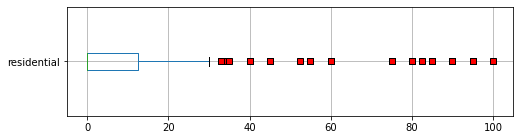

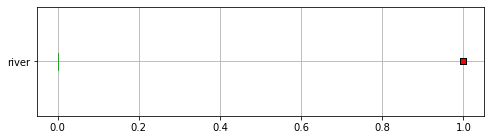

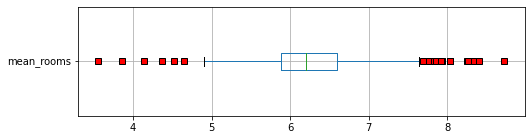

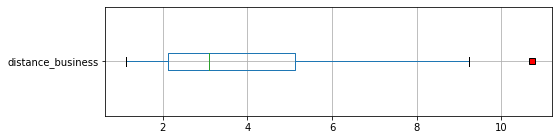

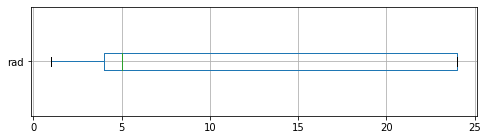

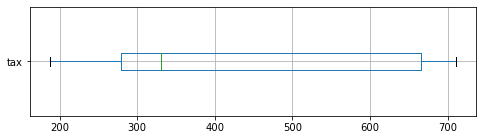

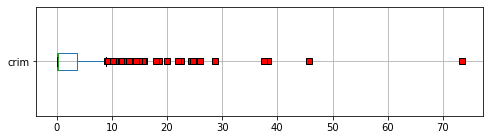

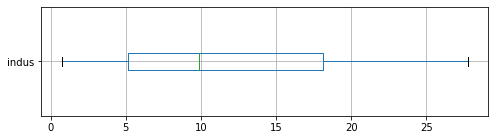

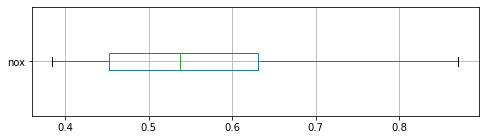

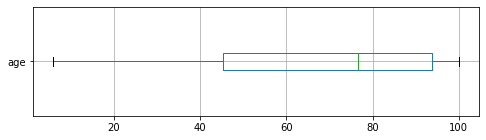

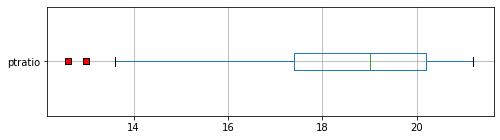

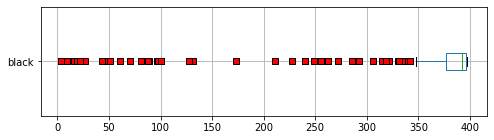

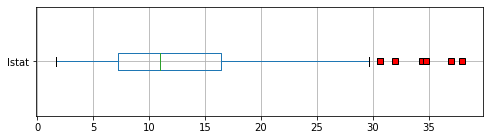

In [15]:
#Utilizamos boxplot para detectar los outliers en nuestros predictores

for predictor in predictors:
    fig = plt.figure(figsize = (8, 2))
    red_square = dict(markerfacecolor = 'r', marker = 's')
    predictors.boxplot([predictor], vert = False, flierprops = red_square)

Vemos que varias variables tienen outliers: para *black* y *crim* era esperable, puesto que, como veiamos en la distribución de estas variables, la mayoría de las casas tienen valores muy similares. No obstante, *lstat* y *resi* también tienen outliers; veíamos más arriba que las casas con precios más altos o más bajos que la mayoría tienen difierencias en los valores de *lstat* y *resi*, por lo que puede ser arriesgado eliminar los outliers. Por tanto, y considerando que no se trata de errores de medición, decidimos mantener el dataset original.

En el siguiente paso, vamos a ver la relación de cada predictor con nuestra variable target. Vamos a usar **regplot** de seaborn: regplot permite visualizar relaciones lineales entre dos variables, que es lo que trata de determinar a regresión lineal. De esta manera podemos visualizar relaciones parciales entre cada predictor y nuestra variable objetivo, previo a aplicar una regresión múltiple con todos los predictores combinados. 

Text(0.5, 0.98, 'Correlación con variable target "medv"')

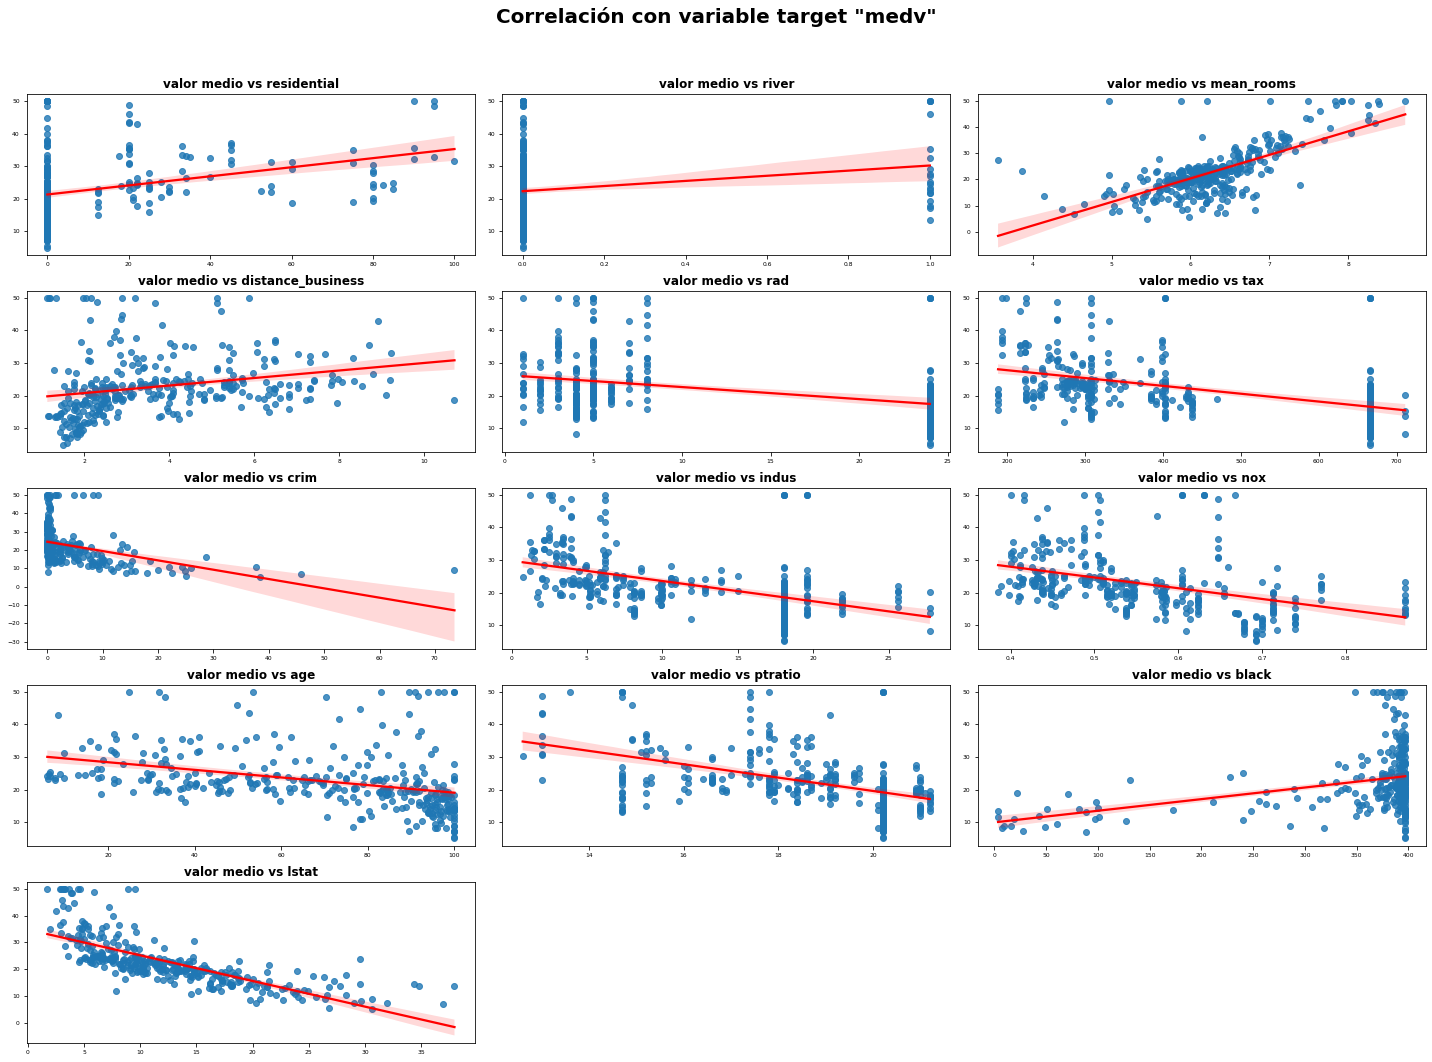

In [16]:
# Vamos a graficar la relación de cada predictor con la variable target con regplot de seaborn
# hacemos un loop que vaya iterando por cada predictor y establecemos un índice para configurar la visualización
# Con el segndo bucle, borramos los plots que aparecerían vacíos

fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 15))
axes = axes.flat

for i, predictor in enumerate(predictors):
    sns.regplot(x = df_train[predictor], y = df_train['medv'], line_kws = {'color':'r'}, ax = axes[i])
    axes[i].set_title(f"valor medio vs {predictor}", fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for i in [13, 14]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Correlación con variable target "medv"',fontsize = 20, fontweight = 'bold')

* Parece haber un correlación negativa clara entre lstat (status social bajo) y el valor medio de las casas.
* Parace haber también una cierta correlación con la media de habitaciones
* Con el resto de variables no hay una relación lineal (parcial) clara

### Análisis de correlaciones

A continuación vamos a ver la correlación de todas las variables

<AxesSubplot:>

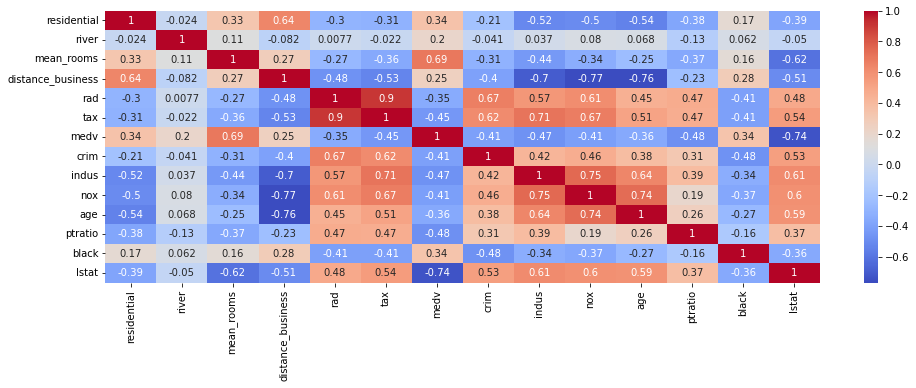

In [17]:
plt.figure(figsize = (16, 5))
sns.heatmap(df_train.corr(), annot = True, cmap='coolwarm')

En relación a nuestro target: 
* Efectivamente, hay una correlación negativa relativamente fuerte con lstat (-0.74);
* También una correlación relativamente alta con la media de habitaciones (0.69). 
* Con resto de variables, las correlaciones parciales no parecen mostrar una relación directa clara.

En relación a los predictores:
* La distancia hasta los centros de empleo (distance_business) tiene una correlación negativa relativamente fuerte con la concentración de óxidos de nitrógeno (nox, -0.77), con el número de negocios no minoristas próximos (indus, -0.7), y con la proporción de viviendas construidas antes de 1940 (age, -0.76). Esto es, a mayor distancia de los centros de empleo, menores concentraciones de nox, menos áreas industriales y menor antigüedad de las casas. 
* Lógicamente, indus y nox tienen una relación relativamente elevada (0.75).
* Hay una correlación **muy elevada** entre el índice de accesibildiad a carreteras radiales (rad) y el impuesto sobre el valor de la propiedad (0.90). Así, cuanto mayor el índice, mayor el impuesto. Habremos de eliminar alguna de las dos: como tax tiene una correlación más fuerte que rad con la variable target (-0.45 vs. -0.35), y como rad tiene muy pocos valores diferentes (como podemos ver en la gráfica anterior), pareciéndose más a una variable categórica que numérica, eliminaremos rad. 

En conclusion, vemos que hay ciertas variables con correlaciones relativamente elevadas entre sí (entre +/- 0.70 y 0.76). Sin embargo, éstas no son exageradas, y optamos por no eliminar ninguna de las variables, aparte de rad, y en cambio utilizaremos fórmulas estadísticas que ayuden a controlar la colinearidad. 

# Preprocessing

## Eliminar variables correlacionadas

In [18]:
# Eliminamos la variable rad

df_train_cleaned = df_train.drop('rad', axis = 1)
df_train_cleaned.head()

,residential,river,mean_rooms,distance_business,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,18.0,0,6.575,4.0900,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43


## Split de los datos

In [19]:
# Procedemos a aislar la variable target para que la estandarización no le afecte

y = df_train_cleaned.pop('medv')

In [20]:
# Procedemos a splitar los datos en entrenamiento y testeo. usamos 60% para entrenamiento
# Trataremos de evitar el overfitting más adelante

X_train, X_test, y_train, y_test = train_test_split(df_train_cleaned, y, test_size = 0.20)

# Algoritmos: regresión lineal

## Regresión lineal múltiple

En primer lugar, vamos a aplicar una regresión lineal múltiple. Para ello, primero la aplicaremos con statsmodels porque permite ver ciertos estadísticos interesantes para, por ejemplo, poder ver si hay predictores cuya explicación de la varianza de la variable target sea baja y podamos descartarlos, para tratar de afinar el modelo. Después, aplicaremos la regresión lineal de scikit learn con regularización Ridge, que nos permitirá minimizar el impacto de una posible colinealidad en las variables predicotras y, además, minimizar también el overfitting. 

In [21]:
# Aplicamos la regresión lineal de statsmodel. 
# El primer paso consiste en añadir una columna a la matriz de predictores, para el intercept del modelo. 
# el parámetro endog corresponde a la variable dependiente; exog a las independientes

X_train_constant = sm.add_constant(X_train, prepend=True)
lr_sm = sm.OLS(endog = y_train, exog = X_train_constant)
lr_sm = lr_sm.fit()
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     63.64
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.84e-69
Time:                        00:31:21   Log-Likelihood:                -781.87
No. Observations:                 266   AIC:                             1590.
Df Residuals:                     253   BIC:                             1636.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                21.0247      6.55

Statsmodel arroja la siguiente información: 
* Con todas las variables introducidas, excepto *rad* (que tenía un correlación positiva con *tax* de 0.9), el modelo explica un 70% de la varianza en el precio de las casas (coeficiente de determinación R-squared = 0.75; Adjusted R-squared = 0.734). No está mal, pero tampoco es genial. 
* El *p-value* del modelo (1.40e-49) es significativo, por lo que el modelo es mejor que lo esperado por azar. 
* si atendemos a los *p-value* de los coeficientes de regresión parciales (columna *P>|t|*), vemos que hay varias variables que no contribuyen de froma significativa al modelo (p-value > 0.05): *tax, crim, indus, y age*. 

Por ello, vamos a crear un nuevo set de entrenamiento sin esas variables, y luego compararemos el funcionamiento de la regresión lineal con y sin ellas.

In [22]:
# Quitamos las variables:
X_train_adjusted = X_train.drop(['tax', 'crim', 'indus', 'age'], axis = 1)
X_test_adjusted = X_test.drop(['tax', 'crim', 'indus', 'age'], axis = 1)

# Entrenamos de nuevo el modelo
X_train_adjusted = sm.add_constant(X_train_adjusted, prepend=True)
lr_sm_adjusted = sm.OLS(endog = y_train, exog = X_train_adjusted)
lr_sm_adjusted = lr_sm_adjusted.fit()
print(lr_sm_adjusted.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     96.36
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           6.91e-73
Time:                        00:31:21   Log-Likelihood:                -782.49
No. Observations:                 266   AIC:                             1583.
Df Residuals:                     257   BIC:                             1615.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                20.6585      6.36

Vemos que no hemos mejorado el modelo; de hecho, hemos perdido un poquito de explicación de la varianza. 
Vamos a aplicarlo a los datos de entrenamiento completos, a analizar los residuos, y luego aplicaremos la regresión lineal de Scikit Learn con regularización de Ridge; tal vez reduzca la colinealidad que podemos tener (de hecho, la segunda nota de statsmodel parece indicarlo) y obtengamos un mejor resultado. 

Text(0.5, 0.98, 'Análisis de Residuos del modelo en entrenamiento')

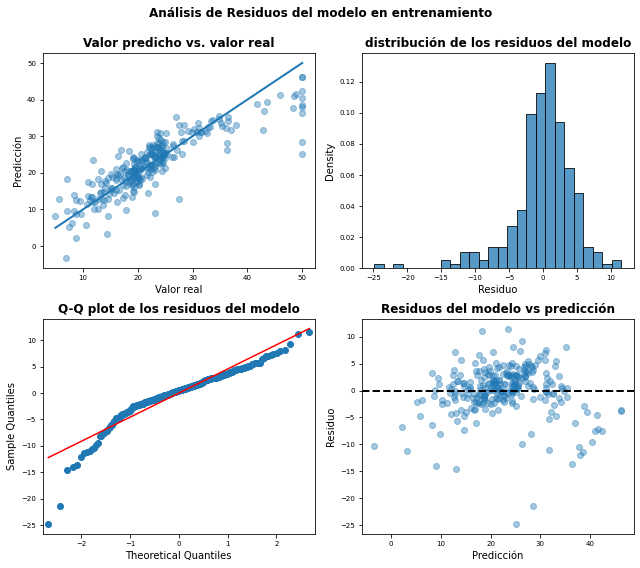

In [23]:
# Obtenemos los residuos (errores) del modelo en entrenamiento:

prediction_train = lr_sm.predict(exog = X_train_constant)
residues_train = prediction_train - y_train

# y analizamos los residuos para ver si el modelo cumple el supuesto de homocedasticidad (igualdad de varianza de los residuos)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 8))

axes[0,0].scatter(y_train, prediction_train, alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], lw = 2)
axes[0, 0].set_title('Valor predicho vs. valor real', fontweight = 'bold')
axes[0, 0].set_xlabel('Valor real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

sns.histplot(data = residues_train, stat = 'density', line_kws = {'linewidth': 1}, ax = axes[0, 1])
axes[0, 1].set_title('distribución de los residuos del modelo', fontweight = 'bold')
axes[0, 1].set_xlabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sm.qqplot(residues_train, line = 's', ax = axes[1, 0], lw = 2)
axes[1, 0].set_title('Q-Q plot de los residuos del modelo', fontweight = "bold")
axes[1, 0].tick_params(labelsize = 7)

axes[1, 1].scatter(prediction_train, residues_train, alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Residuos del modelo vs predicción', fontweight = "bold")
axes[1, 1].set_xlabel('Predicción')
axes[1, 1].set_ylabel('Residuo')
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust (top = 0.9)
plt.suptitle('Análisis de Residuos del modelo en entrenamiento', fontweight = 'bold')


Vemos que:
* No se cumple el supuesto de homocedasticidad, ni los errores siguen una distribución normal, por lo que es posible que al regresión lineal no sea un buen modelo para nuestro dataset. 
* Parece ser que el modelo falla, sobre todo, con aquellas casas cuyo 'medv' tiene valores extremos, los que anteriormente identificábamos como outliers.

Aun así, vamos a aplicarlo a los datos test, a ver qué error (mean squared error) nos da, y posteriormente compararlo con Ridge.

In [25]:
# Lo aplicamos a datos test
X_test_constant = sm.add_constant(X_test_constant, prepend = True)
prediction = lr_sm.predict(exog = X_test_constant)

# y listamos el error con mean_squared_error
mse = mean_squared_error(y_test, prediction)
print('El error mse de test es de: ', mse)


El error mse de test es de:  35.133868792172294


## Regresión lineal con Regularización Ridge

In [26]:
# Entrenamos el modelo de regresión lineal con regularización Ridge y obtenemos el coeficiente de determinación

lr_ridge = Ridge(alpha=1.0)

In [27]:
lr_ridge.fit(X_train, y_train)

coef_determination = lr_ridge.score(X_train, y_train)
coef_determination

0.7502288613205503

In [29]:
# Vamos a aplicarlo a los datos test y medir el error. 

lr_ridge_prediction = lr_ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, lr_ridge_prediction)
print('El error mse de test es de: ', mse_ridge)

El error mse de test es de:  35.58091777450961


El coeficiente de determinación es de 0.75, esto es, con este modelo estamos explicando un 75% de la varianza de la variable target, igual que con el primer modelo, y además el error es ligeramente mayor. Así, no hemos mejorado respecto a la primera regresión lineal con statsmodels. 

Varias hipótesis de por qué  no está mejorando el modelo:
* Los outliers en los predictores están perjudicando. No obstante, tras analizarlos, hemos visto que no parecen errores de medición, por lo que decidimos mantenerlos.
* Antes veíamos que no parece haber una relación lineal entre algunas predictores y la variable dependiente. Podríamos probar una regresión polinomial. 
* No estamos cumpliendo los supuestos de homocedasticidad y/o de colinealidad, por lo que la regresión lineal no sería un buen modelo.  

Así, vamos a probar con una regresión polinomial.

## Regresión polinomial

In [30]:
# Primero, adaptamos los predictores a polinomial 
poly = PolynomialFeatures(degree=2, include_bias = False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [31]:
# Después, entrenamos la regresión logística, con regularización de Ridge para contener el overfitting, 
lr_ridge.fit(X_train_poly, y_train)
lr_ridge.score(X_train_poly, y_train)

0.9283698801645595

Obtenemos un muy buen coeficiente de determinación. Estaríamos explicando un 92% de la varianza de la variable dependiente

Text(0.5, 0.98, 'Análisis de Residuos del modelo en entrenamiento')

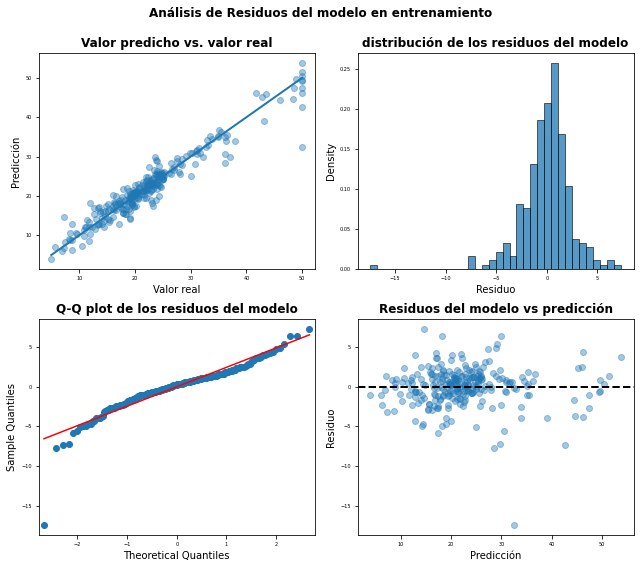

In [32]:
# Analizamos los errores

prediction_poly_train = lr_ridge.predict(X_train_poly)
residues_poly_train = prediction_poly_train - y_train

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 8))

axes[0,0].scatter(y_train, prediction_poly_train, alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], lw = 2)
axes[0, 0].set_title('Valor predicho vs. valor real', fontweight = 'bold')
axes[0, 0].set_xlabel('Valor real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 5)

sns.histplot(data = residues_poly_train, stat = 'density', line_kws = {'linewidth': 1}, ax = axes[0, 1])
axes[0, 1].set_title('distribución de los residuos del modelo', fontweight = 'bold')
axes[0, 1].set_xlabel('Residuo')
axes[0, 1].tick_params(labelsize = 5)

sm.qqplot(residues_poly_train, line = 's', ax = axes[1, 0], lw = 2)
axes[1, 0].set_title('Q-Q plot de los residuos del modelo', fontweight = "bold")
axes[1, 0].tick_params(labelsize = 5)

axes[1, 1].scatter(prediction_poly_train, residues_poly_train, alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Residuos del modelo vs predicción', fontweight = "bold")
axes[1, 1].set_xlabel('Predicción')
axes[1, 1].set_ylabel('Residuo')
axes[1, 1].tick_params(labelsize = 5)

fig.tight_layout()
plt.subplots_adjust (top = 0.9)
plt.suptitle('Análisis de Residuos del modelo en entrenamiento', fontweight = 'bold')

Parece ser que tenemos unas muy buena predicciones. Aunque los residuos todavía no se ajustan del todo a la normal, sí tienen una mejor distribución que en la regresión lineal sin ajuste polinomial. 

In [60]:
# Vamos a aplicarlos a los datos de test

prediction_poly_test = lr_ridge.predict(X_test_poly)

coef_determination_poly = lr_ridge.score(X_test_poly, y_test)

mse_poly = mean_squared_error(y_test, prediction_poly_test)

print('El coeficiente de determinación es: ', coef_determination_poly)
print('El error mse de test es de: ', mse_poly)

El coeficiente de determinación es:  0.8401752233350123
El error mse de test es de:  13.177544647189157


Hemos ganado un 10% de explicación de la variabilidad del traget, y hemos reducido considerablemente el error. 

# Aplicación a los datos predict

la regresión polinomial es el modelo que mejores resultados a dado, así que vamos a aplicarlo

In [34]:
# cargamos los datos y los juntamos

df_predict_1 = pd.read_csv('data Predicción Precio casa/predict_1.csv')
df_predict_2 = pd.read_csv('data Predicción Precio casa/predict_2.csv')

df_predict = pd.merge(df_predict_1, df_predict_2, on='ID')
df_predict

,ID,zn,chas,rm,dis,rad,tax,crim,indus,nox,age,ptratio,black,lstat
0,3,0.0,0,7.185,4.9671,2,242,0.02729,7.07,0.469,61.1,17.8,392.83,4.03
1,6,0.0,0,6.430,6.0622,3,222,0.02985,2.18,0.458,58.7,18.7,394.12,5.21
2,8,12.5,0,6.172,5.9505,5,311,0.14455,7.87,0.524,96.1,15.2,396.90,19.15
3,9,12.5,0,5.631,6.0821,5,311,0.21124,7.87,0.524,100.0,15.2,386.63,29.93
4,10,12.5,0,6.004,6.5921,5,311,0.17004,7.87,0.524,85.9,15.2,386.71,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,496,0.0,0,5.670,2.7986,6,391,0.17899,9.69,0.585,28.8,19.2,393.29,17.60
169,497,0.0,0,5.390,2.7986,6,391,0.28960,9.69,0.585,72.9,19.2,396.90,21.14
170,499,0.0,0,6.019,2.4091,6,391,0.23912,9.69,0.585,65.3,19.2,396.90,12.92
171,501,0.0,0,6.027,2.4982,6,391,0.22438,9.69,0.585,79.7,19.2,396.90,14.33


In [38]:
# aplicamos el preprocessing

df_predict_cleaned = df_predict.drop('rad', axis = 1)
house_id = df_predict_cleaned.pop('ID')

df_predict_cleaned


,zn,chas,rm,dis,tax,crim,indus,nox,age,ptratio,black,lstat
0,0.0,0,7.185,4.9671,242,0.02729,7.07,0.469,61.1,17.8,392.83,4.03
1,0.0,0,6.430,6.0622,222,0.02985,2.18,0.458,58.7,18.7,394.12,5.21
2,12.5,0,6.172,5.9505,311,0.14455,7.87,0.524,96.1,15.2,396.90,19.15
3,12.5,0,5.631,6.0821,311,0.21124,7.87,0.524,100.0,15.2,386.63,29.93
4,12.5,0,6.004,6.5921,311,0.17004,7.87,0.524,85.9,15.2,386.71,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.0,0,5.670,2.7986,391,0.17899,9.69,0.585,28.8,19.2,393.29,17.60
169,0.0,0,5.390,2.7986,391,0.28960,9.69,0.585,72.9,19.2,396.90,21.14
170,0.0,0,6.019,2.4091,391,0.23912,9.69,0.585,65.3,19.2,396.90,12.92
171,0.0,0,6.027,2.4982,391,0.22438,9.69,0.585,79.7,19.2,396.90,14.33


In [39]:
# aplicamos el modelo

predict_poly = poly.transform(df_predict_cleaned)

prediction = lr_ridge.predict(predict_poly)

prediction

array([32.74306037, 23.12290922, 16.55796312, 17.89020489, 18.75924006,
       15.51064801, 16.56228767, 13.09610624, 16.42526616, 13.71134425,
       15.50826471, 17.96067206, 23.47226593, 13.75801472, 21.1891898 ,
       21.22878354, 22.51915205, 31.92611834, 24.10163448, 27.35988739,
       17.31681013, 19.09237618, 18.61417524, 20.23297713, 18.83248455,
       18.63089924, 23.89990382, 26.51351919, 25.48903978, 29.79104066,
       43.00528943, 46.71623452, 36.75794379, 20.8304363 , 17.75436242,
       25.1460568 , 15.22017231, 14.24293852, 16.49287915, 20.81714194,
       15.06753676, 19.70311818, 20.46603006, 16.61737336, 12.91352895,
       15.10870746, 14.50684245, 16.1289431 , 17.76435395, 14.48273084,
       25.06234405, 36.89532168, 45.66661766, 24.37292377, 19.89278777,
       25.52402811, 31.24186121, 47.71194404, 36.69591214, 33.20748161,
       32.23446722, 42.78118009, 17.54875851, 16.98881292, 19.61430664,
       25.65284937, 23.20987669, 26.5557962 , 17.76994738, 22.67

In [58]:
prediction = pd.Series(prediction, name = 'predictions')

predictions = pd.concat([house_id, prediction], axis=1)
predictions

,ID,predictions
0,3,32.743060
1,6,23.122909
2,8,16.557963
3,9,17.890205
4,10,18.759240
...,...,...
168,496,24.389660
169,497,17.198272
170,499,22.406406
171,501,19.552185


In [59]:
predictions.to_csv('OlivaL_resultado_pred.csv')

# Conclusiones

* El modelo de regresión que mejor ha funcionado es el modelo de regresión polinomial y con regularización de Ridge. 
* No obstante, este modelo tiene riesgos: la regresión polinomila tiende al overfitting. 
* Hemos tratado de controlar el overfitting con la regularización de Ridge, pero aun así, será necesario vigilar esta limitación. 
* Un problema ha sido que los datos no se ajustaba lo suficiente a los supuestos requeridos por la regresión logística, aunque con la regresión polinomial conseguimos mejorar la homocedasticidad y las predicciones. 
* En este sentido, sería interesante seguir a partir de aquí con algortimos más complejos y a los que afecte menos la violación de los supuestos. 